# Diabetes Data Analytics

### Importing necessary packages

In [2]:
import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)

#for histograms
import matplotlib.pyplot as plt
import matplotlib.cm
from matplotlib.ticker import StrMethodFormatter

### Importing the Diabetes XLSX file
Import the data and test if all the columns are loaded
The Data frame has been assigned a name of ‘diabetes_data’

In [3]:
diabetes_data=pd.read_excel("Diabetes.xlsx",sheet_name='Data')

In [4]:
# Checking for the intial 5 records
diabetes_data.head()

,S.NO,AGE,SEX,FBS,OGTT1,HBA1C1,OGTT1FBS,OGTT1PGBS,PPBS1,NDD,Height1,Weight,BMI,HC,WHR,NonOGTT,HBA1CNDD,NEWFBSNDD
0,11,50,0,145,0,7.0,NaN,NaN,247.0,1,160.0,78.0,30.468750,110.0,1.036364,1,1,1
1,14,46,0,310,0,15.0,NaN,NaN,386.0,1,153.0,49.0,20.932120,96.0,0.885417,1,1,1
2,17,40,0,101,0,6.0,NaN,NaN,144.0,0,158.0,76.0,30.243551,104.0,1.038462,1,0,0
3,20,55,1,127,0,10.0,NaN,NaN,200.0,1,184.0,66.0,19.494329,110.0,1.054545,1,1,1
4,21,41,0,100,0,7.0,NaN,NaN,132.0,0,154.0,99.0,41.743970,144.0,0.833333,1,1,0


In [5]:
# Checking for the last 5 records
diabetes_data.tail()

,S.NO,AGE,SEX,FBS,OGTT1,HBA1C1,OGTT1FBS,OGTT1PGBS,PPBS1,NDD,Height1,Weight,BMI,HC,WHR,NonOGTT,HBA1CNDD,NEWFBSNDD
916,916,60,0,94,2,5.0,94.0,NaN,NaN,0,152.0,74.0,32.029086,92.0,1.065217,1,0,0
917,925,54,0,90,2,6.0,90.0,NaN,NaN,0,164.0,75.0,27.885187,94.0,0.978723,1,0,0
918,936,53,1,88,2,5.0,88.0,NaN,NaN,0,165.0,78.0,28.650138,94.0,1.042553,1,0,0
919,939,69,0,95,2,6.0,95.0,NaN,NaN,0,149.0,79.0,35.583983,129.0,0.922481,1,0,0
920,949,51,1,110,2,5.0,110.0,NaN,NaN,0,155.0,40.0,16.649324,78.0,0.974359,1,0,0


In [6]:
#Checking for the row, column count of the dataframe
diabetes_data.shape

(921, 18)

In [7]:
#Checking for the column datatypes
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 921 entries, 0 to 920
Data columns (total 18 columns):
S.NO         921 non-null int64
AGE          921 non-null int64
SEX          921 non-null int64
FBS          921 non-null int64
OGTT1        921 non-null int64
HBA1C1       921 non-null float64
OGTT1FBS     789 non-null float64
OGTT1PGBS    683 non-null float64
PPBS1        132 non-null float64
NDD          921 non-null int64
Height1      920 non-null float64
Weight       920 non-null float64
BMI          920 non-null float64
HC           879 non-null float64
WHR          879 non-null float64
NonOGTT      921 non-null int64
HBA1CNDD     921 non-null int64
NEWFBSNDD    921 non-null int64
dtypes: float64(9), int64(9)
memory usage: 129.6 KB


# Creating a copy and Removing columns

In [8]:
diabetes_copy = diabetes_data.copy(deep=True)

In [9]:
#removing columns
columns=['S.NO','NonOGTT','NEWFBSNDD']
diabetes_copy.drop(columns=columns,axis=1,inplace=True)

In [10]:
#dropping 1 record where below 'Weight','Height1' and 'BMI' are null
diabetes_copy.dropna(subset=['Weight','Height1','BMI'],inplace=True)

### Preliminary Descriptive Stats

In [11]:
#5 point summary
diabetes_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,920.0,48.832609,11.914559,20.000000,41.000000,48.000000,56.000000,83.000000
SEX,920.0,0.501087,0.500271,0.000000,0.000000,1.000000,1.000000,1.000000
FBS,920.0,126.278261,62.532540,62.000000,89.000000,105.500000,136.250000,702.000000
OGTT1,920.0,0.971739,0.508112,0.000000,1.000000,1.000000,1.000000,2.000000
HBA1C1,920.0,7.356522,2.676745,4.000000,6.000000,6.000000,8.000000,21.000000
OGTT1FBS,788.0,122.393401,61.007364,62.000000,88.000000,102.000000,130.000000,702.000000
OGTT1PGBS,682.0,193.804985,110.026449,63.000000,114.000000,153.000000,247.500000,698.000000
PPBS1,132.0,242.212121,117.309471,70.000000,147.750000,224.500000,290.500000,607.000000
NDD,920.0,0.426087,0.494776,0.000000,0.000000,0.000000,1.000000,1.000000
Height1,920.0,159.558043,7.984752,136.000000,154.000000,159.000000,165.000000,188.000000


In [12]:
#Check for null values
diabetes_copy.isnull().values.any()

True

In [13]:
#null value columns
diabetes_copy.isnull().sum()

AGE            0
SEX            0
FBS            0
OGTT1          0
HBA1C1         0
OGTT1FBS     132
OGTT1PGBS    238
PPBS1        788
NDD            0
Height1        0
Weight         0
BMI            0
HC            41
WHR           41
HBA1CNDD       0
dtype: int64

In [14]:
#changing the data type of the below columns
diabetes_copy=diabetes_copy.astype({'NDD':object,'SEX':object,'HBA1CNDD':object,'HBA1C1':object,'OGTT1':object})

In [15]:
diabetes_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,920.0,48.832609,11.914559,20.000000,41.000000,48.000000,56.000000,83.000000
FBS,920.0,126.278261,62.532540,62.000000,89.000000,105.500000,136.250000,702.000000
OGTT1FBS,788.0,122.393401,61.007364,62.000000,88.000000,102.000000,130.000000,702.000000
OGTT1PGBS,682.0,193.804985,110.026449,63.000000,114.000000,153.000000,247.500000,698.000000
PPBS1,132.0,242.212121,117.309471,70.000000,147.750000,224.500000,290.500000,607.000000
Height1,920.0,159.558043,7.984752,136.000000,154.000000,159.000000,165.000000,188.000000
Weight,920.0,68.205435,13.475249,34.000000,60.000000,68.000000,76.000000,142.000000
BMI,920.0,26.767573,4.865129,13.671875,23.631637,26.573129,29.533148,50.219138
HC,879.0,97.610922,14.597287,56.000000,88.000000,96.000000,109.000000,150.000000
WHR,879.0,0.951262,0.104804,0.565891,0.890909,0.954545,1.020204,1.750000


# IMPUTATION

In [16]:
#PPBS1 imputation based on NDD 1 and 0

df_diab=diabetes_copy.loc[(diabetes_copy['NDD']==1) & (diabetes_copy['PPBS1'].isna()==False)]
df_non_diab=diabetes_copy.loc[(diabetes_copy['NDD']==0) & (diabetes_copy['PPBS1'].isna()==False)]

diab_ppbs_CT=df_diab['PPBS1'].median()
nondiab_ppbs_CT=df_non_diab['PPBS1'].median()

diabetes_copy['PPBS1']=np.where((diabetes_copy['NDD']==1) & (diabetes_copy['PPBS1'].isna()==True),diab_ppbs_CT,diabetes_copy['PPBS1'])
diabetes_copy['PPBS1']=np.where((diabetes_copy['NDD']==0) & (diabetes_copy['PPBS1'].isna()==True),nondiab_ppbs_CT,diabetes_copy['PPBS1'])


In [17]:
#if OGTT1 is 0 (test is not performed) or 2(test performed but missing results) and if OGTT1FBS or OGTT1PGBS are null then replace with 0
diabetes_copy.loc[(((diabetes_copy['OGTT1'] == 0) | (diabetes_copy['OGTT1'] == 2)) & (diabetes_copy['OGTT1FBS'].isnull())),'OGTT1FBS']=0
diabetes_copy.loc[(((diabetes_copy['OGTT1'] == 0) | (diabetes_copy['OGTT1'] == 2)) & (diabetes_copy['OGTT1PGBS'].isnull())),'OGTT1PGBS']=0


In [18]:
#imputation for HC and WHR
diabetes_copy['HC']=np.where(diabetes_copy['HC'].isna()==True,diabetes_copy['HC'].median(),diabetes_copy['HC'])
diabetes_copy['WHR']=np.where(diabetes_copy['WHR'].isna()==True,diabetes_copy['WHR'].median(),diabetes_copy['WHR'])

In [19]:
#null value columns
diabetes_copy.isnull().values.any()

False

### Inserting new column "Result" & "BMIChart" which will store the dependant variables for Diabetes 

In [20]:
diabetes_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 920
Data columns (total 15 columns):
AGE          920 non-null int64
SEX          920 non-null object
FBS          920 non-null int64
OGTT1        920 non-null object
HBA1C1       920 non-null object
OGTT1FBS     920 non-null float64
OGTT1PGBS    920 non-null float64
PPBS1        920 non-null float64
NDD          920 non-null object
Height1      920 non-null float64
Weight       920 non-null float64
BMI          920 non-null float64
HC           920 non-null float64
WHR          920 non-null float64
HBA1CNDD     920 non-null object
dtypes: float64(8), int64(2), object(5)
memory usage: 115.0+ KB


In [21]:
diabetes_copy.insert(15,"Result",0)
diabetes_copy.insert(16,"BMIChart",0)

In [22]:
#Inserting values  for REsult column

diabetes_copy.loc[(diabetes_copy['NDD'] == 0) & (diabetes_copy['HBA1CNDD'] == 0),'Result'] = 0
diabetes_copy.loc[(diabetes_copy['NDD'] == 1) & (diabetes_copy['HBA1CNDD'] == 1),'Result'] = 1
diabetes_copy.loc[(diabetes_copy['NDD'] == 1) & (diabetes_copy['HBA1CNDD'] == 0),'Result'] = 2
diabetes_copy.loc[(diabetes_copy['NDD'] == 0) & (diabetes_copy['HBA1CNDD'] == 1),'Result'] = 3

diabetes_copy.groupby('Result').size()

Result
0    443
1    342
2     50
3     85
dtype: int64

In [23]:
#Inserting values  for BMIchart column

diabetes_copy.loc[(diabetes_copy['BMI']<18.5),'BMIChart'] = 0
diabetes_copy.loc[((diabetes_copy['BMI']>=18.5) & (diabetes_copy['BMI']<25)), 'BMIChart'] = 1
diabetes_copy.loc[((diabetes_copy['BMI']>=25) &(diabetes_copy['BMI']<30)), 'BMIChart'] = 2
diabetes_copy.loc[(diabetes_copy['BMI']>=30),'BMIChart'] = 3



In [24]:
diabetes_copy.groupby('BMIChart').size()

BMIChart
0     37
1    281
2    403
3    199
dtype: int64

In [25]:
diabetes_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 0 to 920
Data columns (total 17 columns):
AGE          920 non-null int64
SEX          920 non-null object
FBS          920 non-null int64
OGTT1        920 non-null object
HBA1C1       920 non-null object
OGTT1FBS     920 non-null float64
OGTT1PGBS    920 non-null float64
PPBS1        920 non-null float64
NDD          920 non-null object
Height1      920 non-null float64
Weight       920 non-null float64
BMI          920 non-null float64
HC           920 non-null float64
WHR          920 non-null float64
HBA1CNDD     920 non-null object
Result       920 non-null int64
BMIChart     920 non-null int64
dtypes: float64(8), int64(4), object(5)
memory usage: 129.4+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280B5D4E8C8>,
      dtype=object)

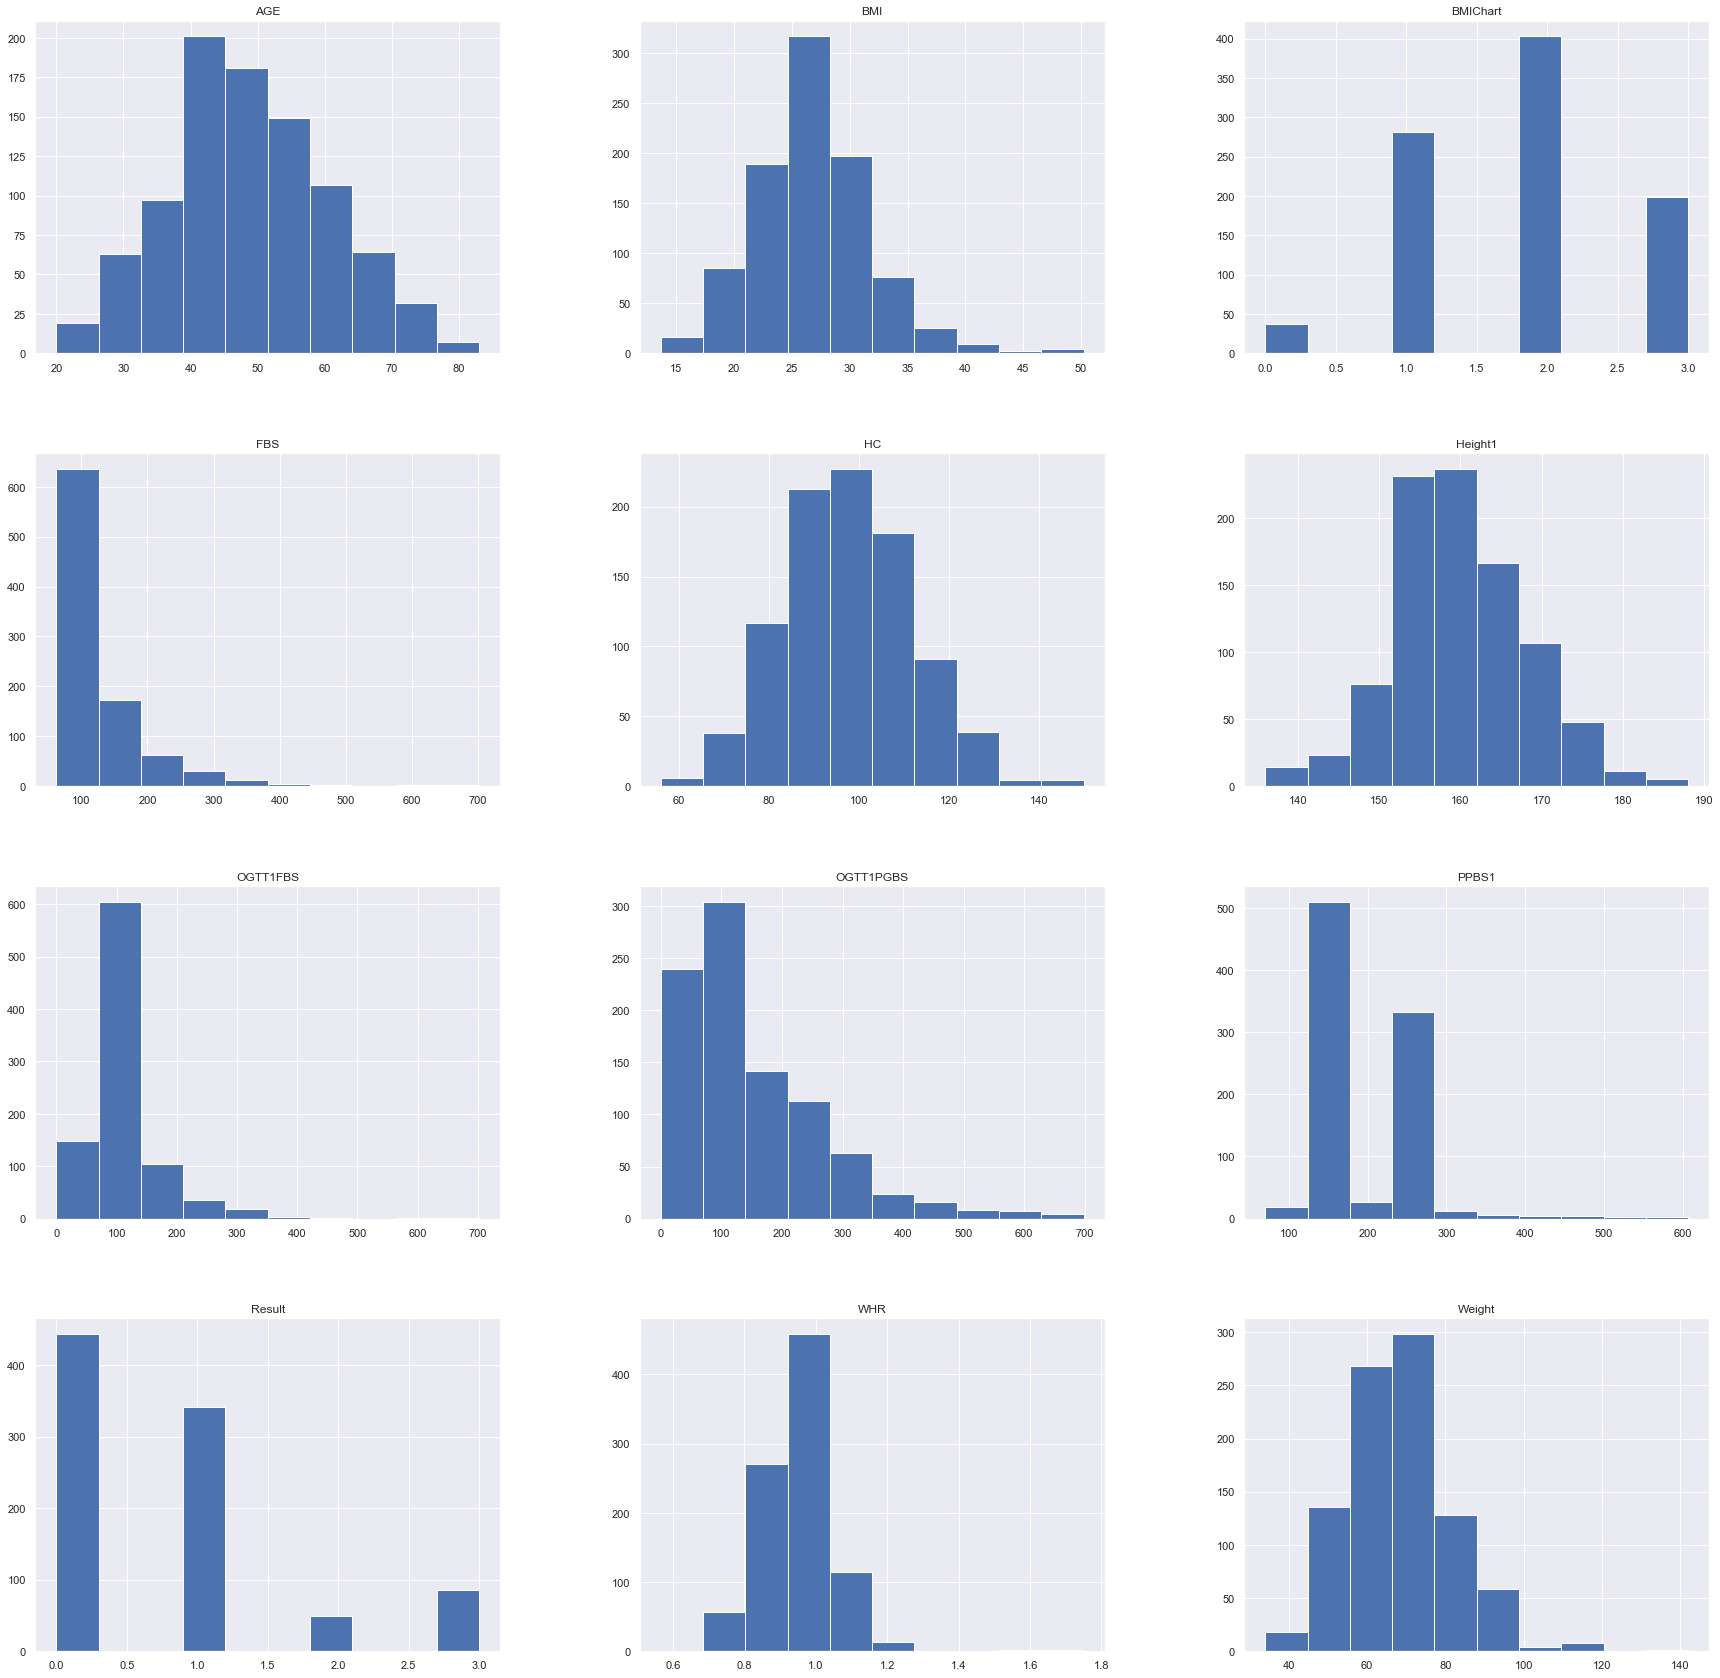

In [26]:
diabetes_copy.hist(figsize = (30,30))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000280B9131FC8>,
      dtype=object)

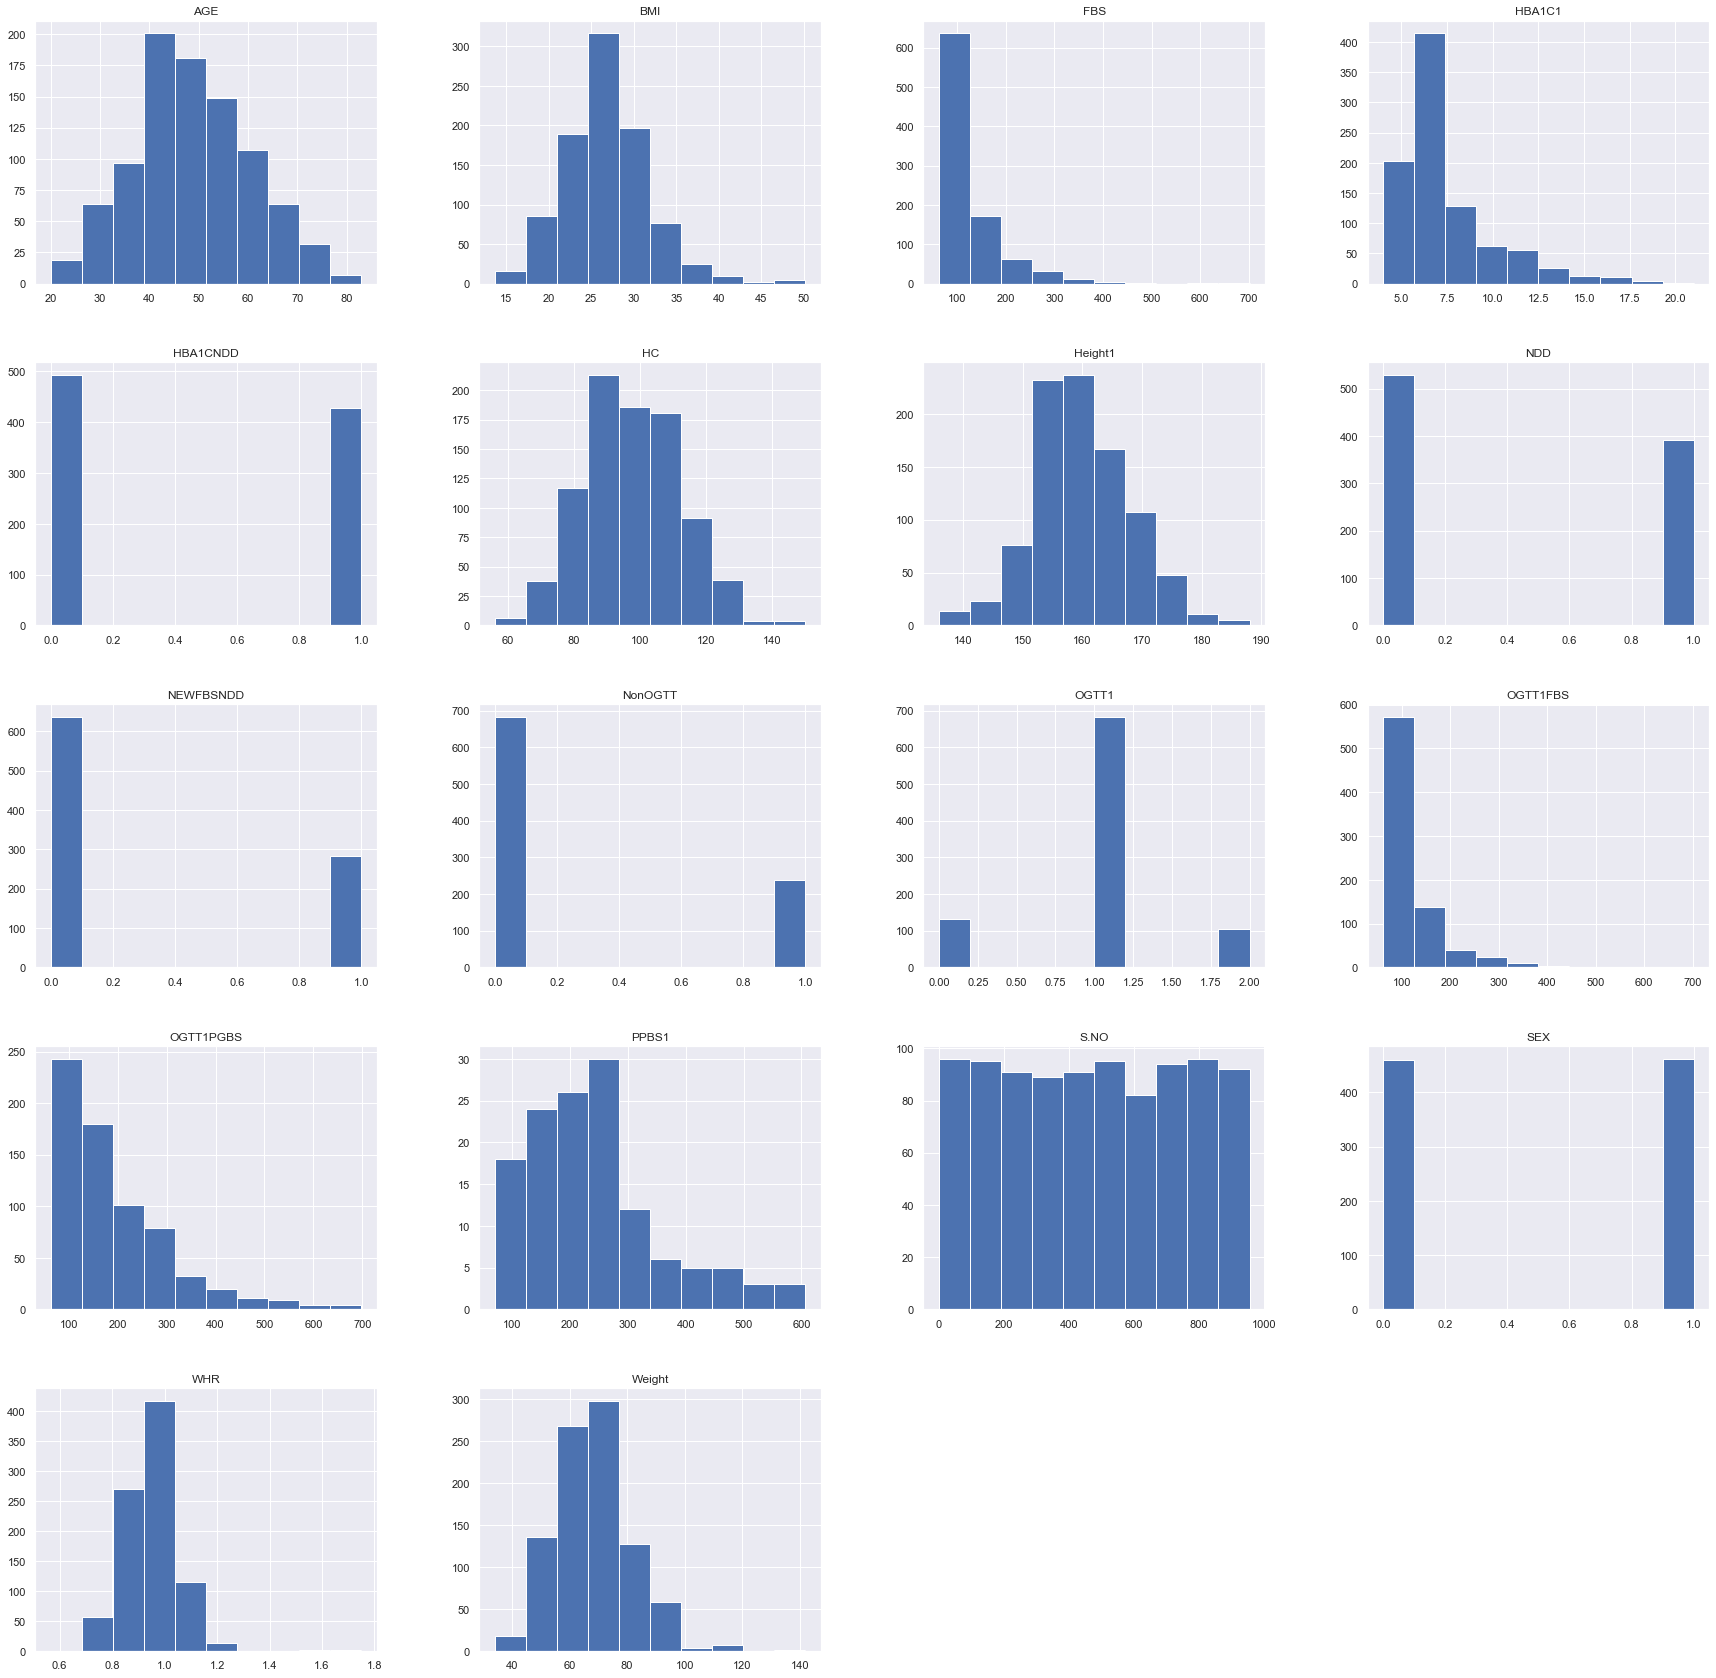

In [27]:
## code to check before imputation

diabetes_data.hist(figsize = (30,30))

In [28]:
#Pearson Correlation matrix prior to imputation
diabetes_data.corr(method='pearson')

,S.NO,AGE,SEX,FBS,OGTT1,HBA1C1,OGTT1FBS,OGTT1PGBS,PPBS1,NDD,Height1,Weight,BMI,HC,WHR,NonOGTT,HBA1CNDD,NEWFBSNDD
S.NO,1.000000,0.015390,0.047100,0.014163,0.010322,0.029177,0.048606,0.079916,-0.112013,0.059867,0.074527,0.031777,-0.004579,0.062283,-0.006383,0.072205,0.079912,0.037424
AGE,0.015390,1.000000,0.126014,0.141489,-0.090787,0.174188,0.142462,0.212918,0.004473,0.207689,0.080135,-0.069709,-0.116923,-0.133250,0.158619,0.157751,0.194906,0.160133
SEX,0.047100,0.126014,1.000000,0.071862,0.008738,0.082645,0.091924,0.123013,-0.101359,0.120172,0.427976,0.104483,-0.125620,-0.158741,0.280205,0.027841,0.110169,0.096572
FBS,0.014163,0.141489,0.071862,1.000000,-0.064880,0.733089,0.999986,0.873317,0.742395,0.612974,0.126703,-0.051602,-0.124948,-0.104436,0.094277,0.167606,0.537349,0.723397
OGTT1,0.010322,-0.090787,0.008738,-0.064880,1.000000,-0.181456,0.095538,NaN,NaN,-0.177102,0.008950,-0.012342,-0.020861,-0.019130,0.033841,-0.094221,-0.196945,-0.097195
HBA1C1,0.029177,0.174188,0.082645,0.733089,-0.181456,1.000000,0.764379,0.802934,0.687051,0.648852,0.107148,-0.058461,-0.123815,-0.091491,0.079881,0.185221,0.718010,0.645076
OGTT1FBS,0.048606,0.142462,0.091924,0.999986,0.095538,0.764379,1.000000,0.873317,NaN,0.616800,0.135112,-0.035398,-0.113020,-0.115476,0.132114,0.095538,0.540133,0.721427
OGTT1PGBS,0.079916,0.212918,0.123013,0.873317,NaN,0.802934,0.873317,1.000000,NaN,0.774633,0.158651,-0.018182,-0.102266,-0.092373,0.092062,NaN,0.661330,0.726398
PPBS1,-0.112013,0.004473,-0.101359,0.742395,NaN,0.687051,NaN,NaN,1.000000,0.639374,0.038293,-0.159410,-0.191348,0.056997,-0.272114,NaN,0.512539,0.489848
NDD,0.059867,0.207689,0.120172,0.612974,-0.177102,0.648852,0.616800,0.774633,0.639374,1.000000,0.147534,-0.047090,-0.130781,-0.061872,0.078744,0.133944,0.703735,0.775665


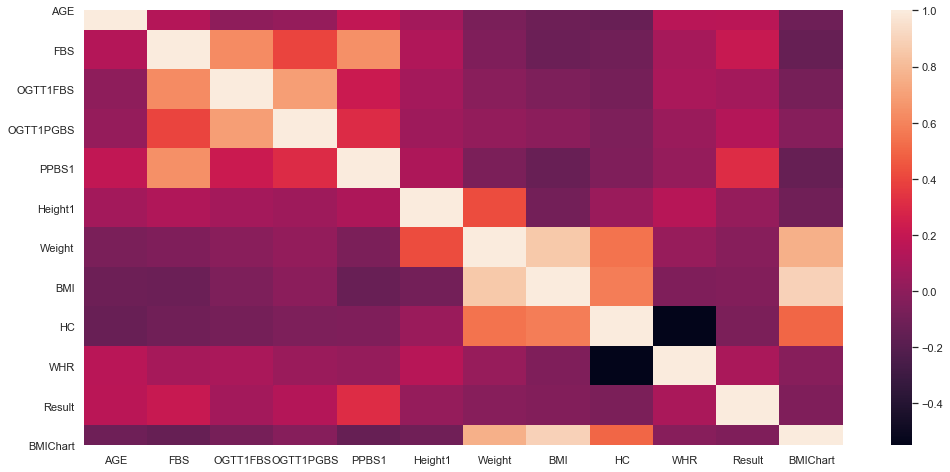

In [29]:
#Heatmap post imputation
plt.subplots(figsize=(17,8))        
sns.heatmap(diabetes_copy.corr())

In [33]:
#Replacement variables for graphical representation
# created diabetes_copy_obj for plotting
diabetes_copy_obj=diabetes_copy.copy(deep=True)
diabetes_copy_obj.loc[(diabetes_copy_obj['SEX'] == 0),'SEX'] = "Female"
diabetes_copy_obj.loc[(diabetes_copy_obj['SEX'] == 1),'SEX'] = "Male"

diabetes_copy_obj.loc[(diabetes_copy_obj['Result'] == 0),'Result'] = "Healthy"
diabetes_copy_obj.loc[(diabetes_copy_obj['Result'] == 1),'Result'] = "Diabetic"
diabetes_copy_obj.loc[(diabetes_copy_obj['Result'] == 2),'Result'] = "Nascent Diabetic"
diabetes_copy_obj.loc[(diabetes_copy_obj['Result'] == 3),'Result'] = "Recovering Diabetic"

diabetes_copy_obj.loc[(diabetes_copy_obj['BMIChart'] == 0),'BMIChart'] = "Underweight"
diabetes_copy_obj.loc[(diabetes_copy_obj['BMIChart'] == 1),'BMIChart'] = "Normal"
diabetes_copy_obj.loc[(diabetes_copy_obj['BMIChart'] == 2),'BMIChart'] = "Overweight"
diabetes_copy_obj.loc[(diabetes_copy_obj['BMIChart'] == 3),'BMIChart'] = "Obese"

c:\users\shalini\pyspark\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count Plot for the Diabetic Result')

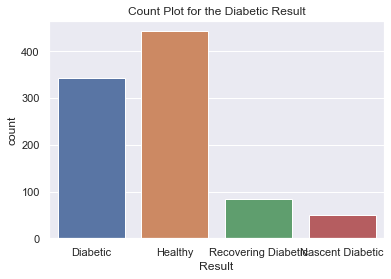

In [31]:
#f, Axis = plt.subplots(1,2,figsize=(8,8))
#GRaphical representation of the REsult Variable
sns.countplot(diabetes_copy_obj['Result'])
plt.title("Count Plot for the Diabetic Result")

Text(0.5, 1.0, 'Bar Plot on WHR and Diabetes Ratio based on the gender')

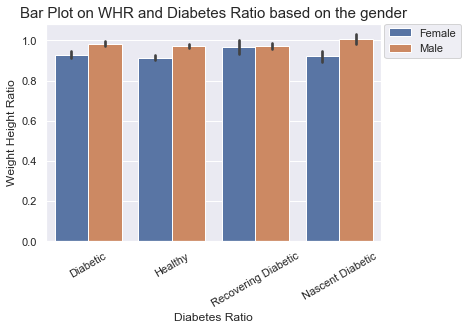

In [33]:
fig = sns.barplot(x='Result',y='WHR',data=diabetes_copy_obj, hue='SEX')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xticks(rotation=30, horizontalalignment="center")
fig.set_xlabel("Diabetes Ratio")
fig.set_ylabel("Weight Height Ratio")
plt.title('Bar Plot on WHR and Diabetes Ratio based on the gender',fontsize=15)
#diabetes_data.plot.bar()


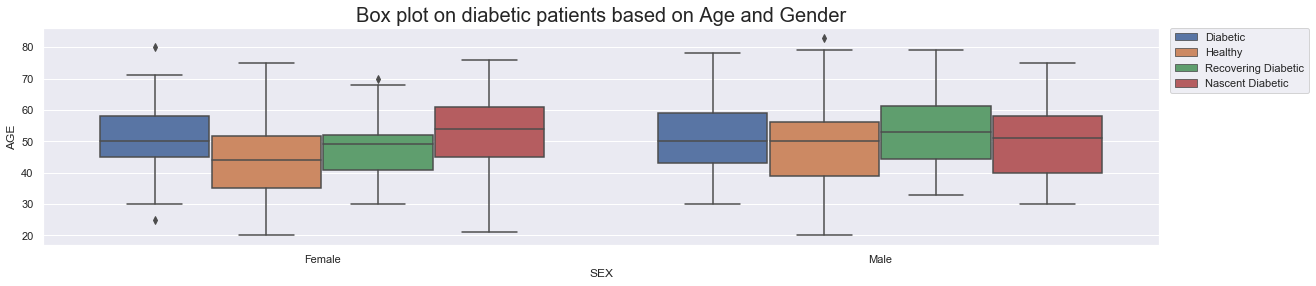

In [34]:
# box plot
plt.figure(figsize=(20,4))

f = sns.boxplot(data=diabetes_copy_obj,x='SEX',y='AGE',hue='Result')
f.legend(title="Is Diabetic")

plt.title('Box plot on diabetic patients based on Age and Gender',fontsize=20)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()
#corr_matrix =  diabetes_data.corr()  
#corr_matrix

c:\users\sruth\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Pairplot of Variables by Result')

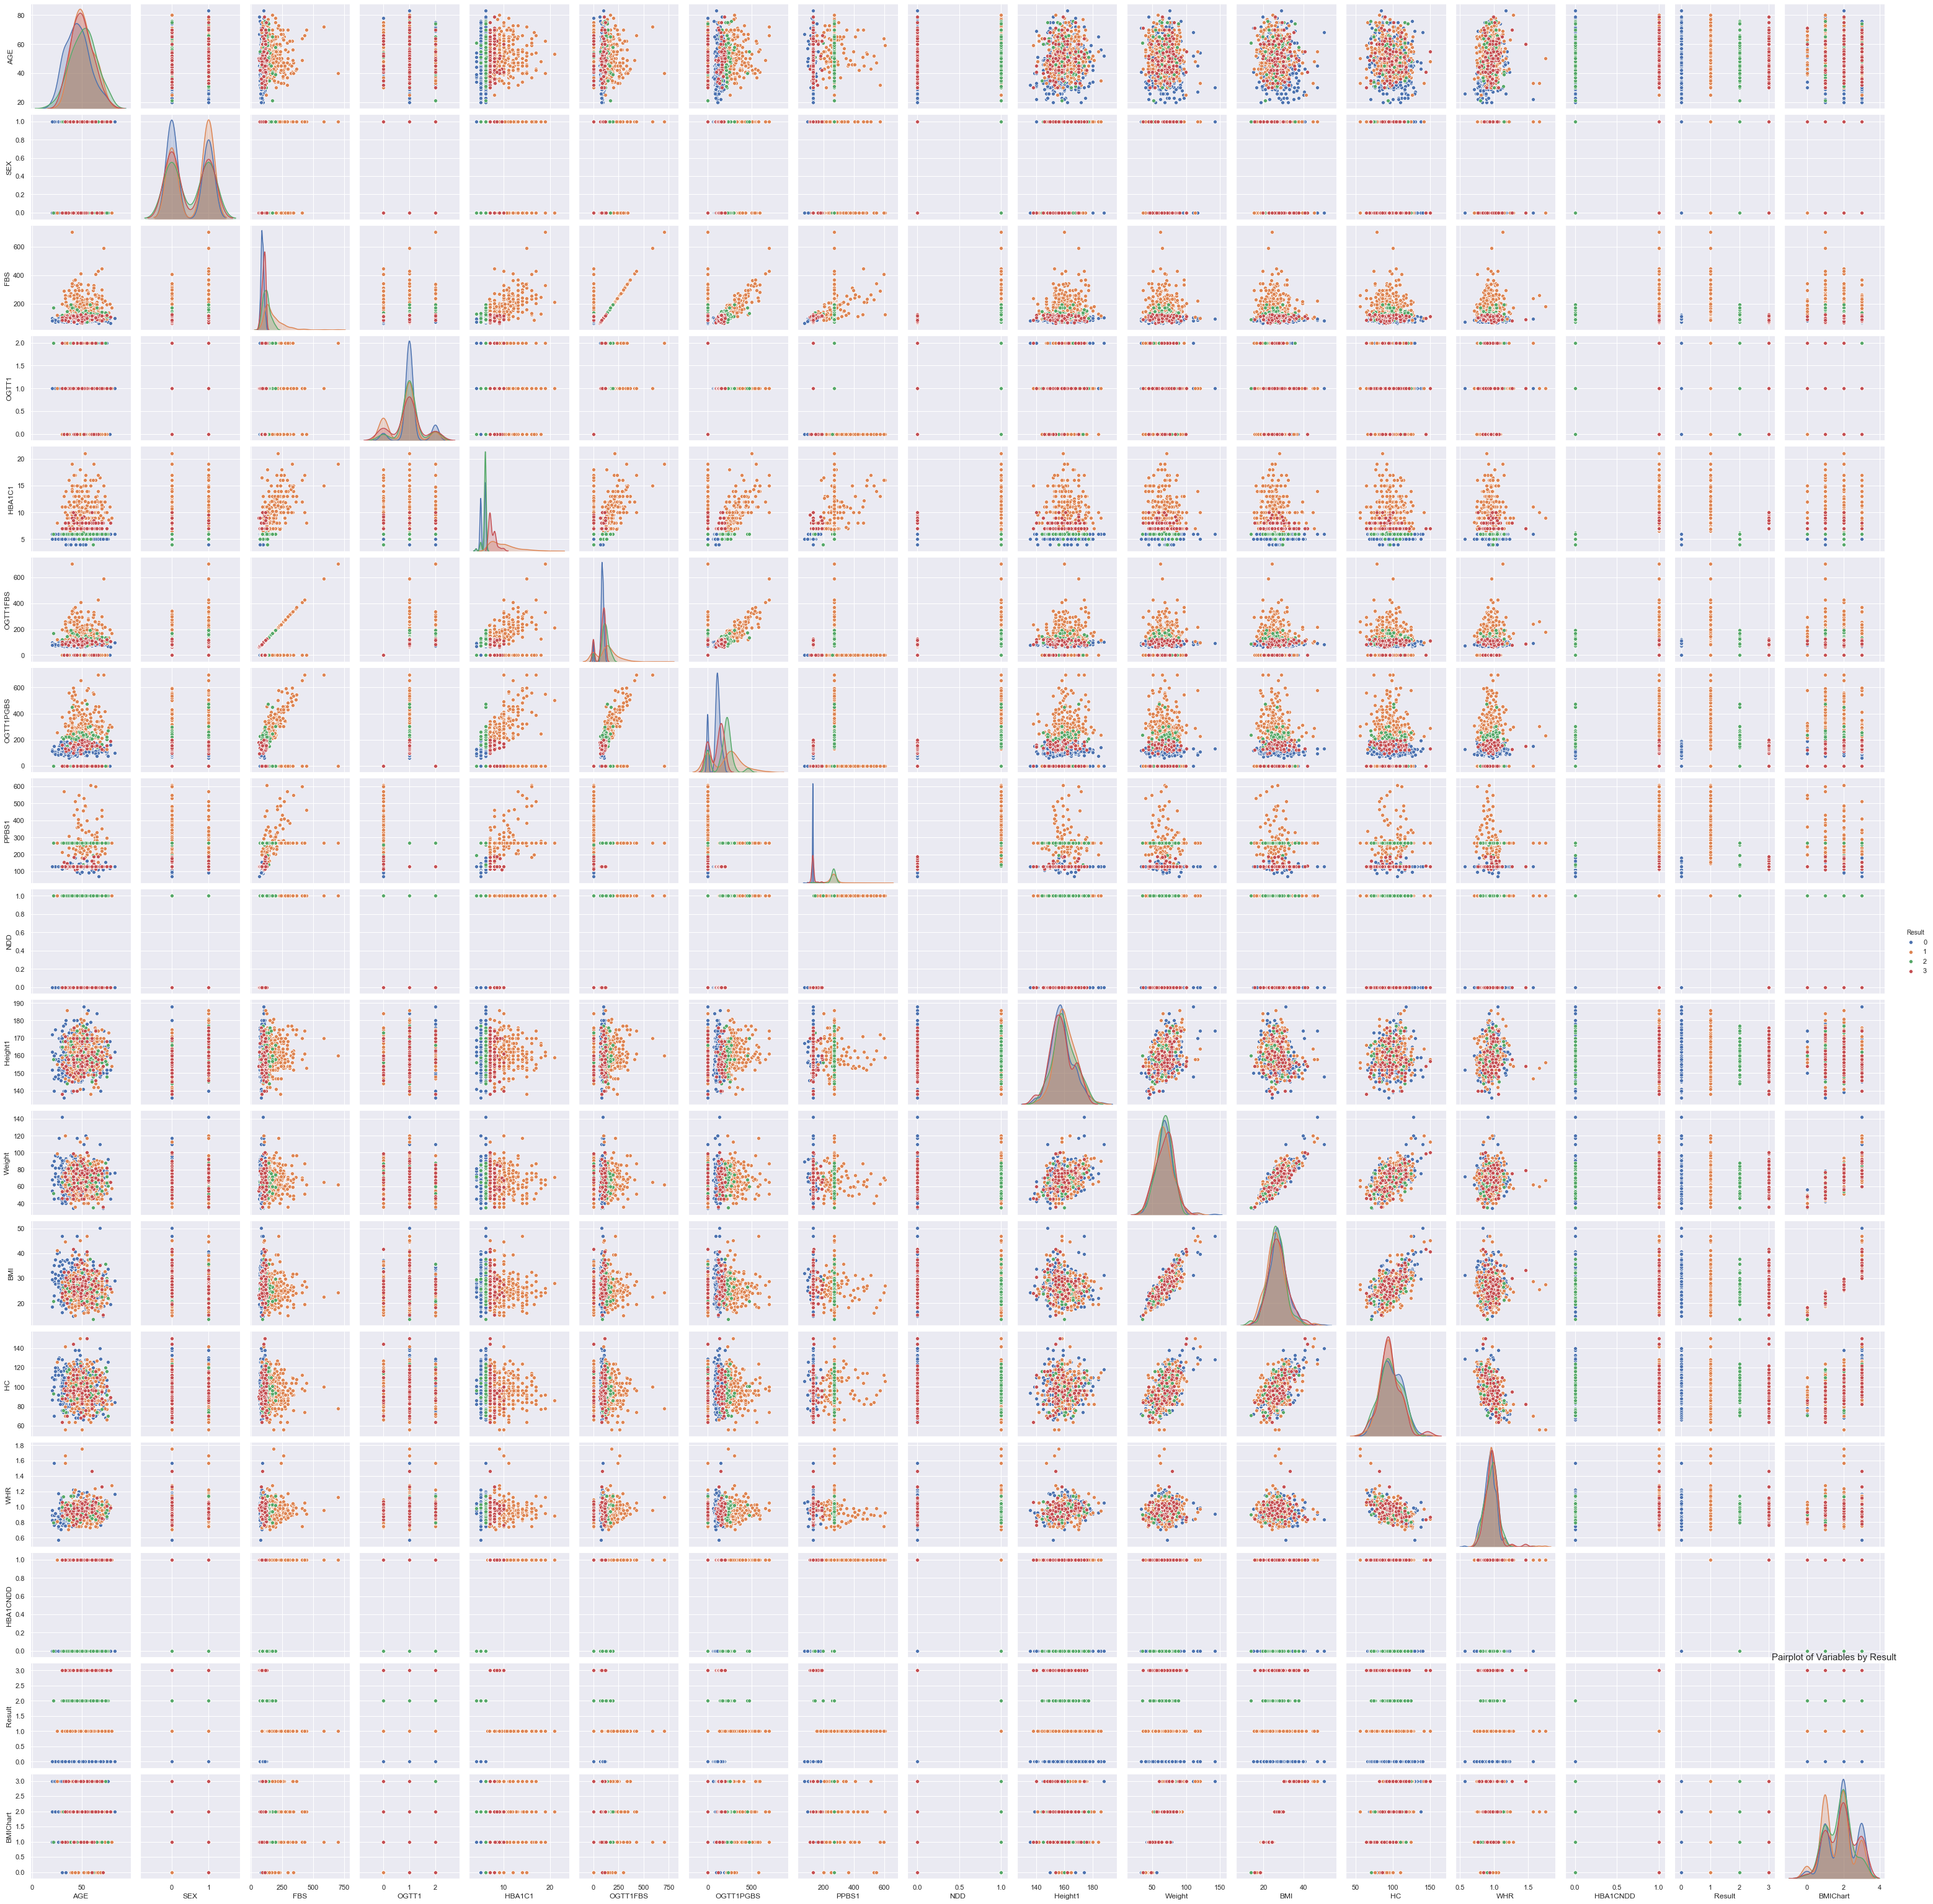

In [35]:
sns.pairplot(diabetes_copy, vars=diabetes_copy.columns.tolist(),hue="Result")
plt.title("Pairplot of Variables by Result",fontsize=15)

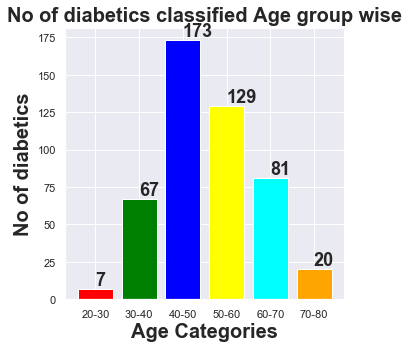

In [36]:

df2030 =diabetes_copy.query(' (Result == 1 | Result==2 | Result==3) & ( AGE >= 20 & AGE <= 30)')
df3040= diabetes_copy.query(' (Result == 1 | Result==2 | Result==3) & ( AGE >30 & AGE <= 40)')  
df4050= diabetes_copy.query(' (Result == 1 | Result==2 | Result==3) & ( AGE >40 & AGE <= 50)' )
df5060= diabetes_copy.query(' (Result == 1 | Result==2 | Result==3) & ( AGE >50 & AGE <= 60) ' )
df6070= diabetes_copy.query(' (Result == 1 | Result==2 | Result==3 )& ( AGE >60 & AGE <= 70) ' )
df7080= diabetes_copy.query(' (Result == 1 | Result==2 | Result==3) & ( AGE >70 & AGE <= 80) ' )

x=["20-30","30-40","40-50","50-60","60-70","70-80"]
y=[len(df2030),len(df3040),len(df4050),len(df5060),len(df6070),len(df7080)]
tick_label = ['20-30', '30-40', '40-50', '50-60','60-70','70-80']
plt.figure(figsize=(5,5))
bar_plot=plt.bar(x, y, tick_label=tick_label, width=0.8, color=['red', 'green','blue','yellow','aqua','orange'])
plt.xlabel('Age Categories',fontsize=20,fontweight='bold')
plt.ylabel('No of diabetics',fontsize=20,fontweight='bold')
plt.title('No of diabetics classified Age group wise',fontsize=20,fontweight='bold')
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), fontsize=18,fontweight='bold',va='bottom') #va: vertical alignment y positional argument
plt.show()

In [37]:
#functions for ease
def plotHist(ddf,xCol,xLabel,title):    
    ax = ddf.hist(column=xCol, bins=8, grid=False, figsize=(12,8), color='#86bf91', zorder=2, rwidth=0.9)

    ax = ax[0]
    for x in ax:
        # Despine
        x.spines['right'].set_visible(False)
        x.spines['top'].set_visible(False)
        x.spines['left'].set_visible(False)
    
        # Switch off ticks
        x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")
    
        # Draw horizontal axis lines
        vals = x.get_yticks()
        for tick in vals:
            x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)
    
        # Remove title
        x.set_title(title)
    
        # Set x-axis label
        x.set_xlabel(xLabel, labelpad=20, weight='bold', size=12)
    
        # Set y-axis label
        x.set_ylabel("Number of persons", labelpad=20, weight='bold', size=12)
    
        # Format y-axis label
        x.yaxis.set_major_formatter(StrMethodFormatter('{x:,g}')) 


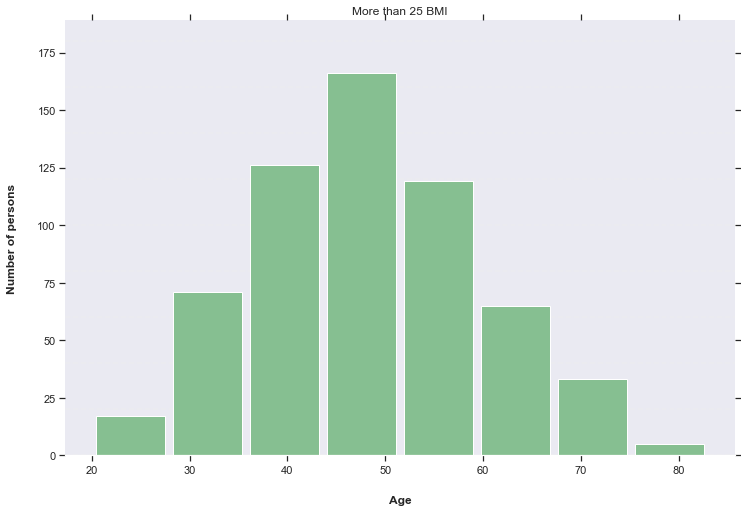

In [38]:
bmiDf = diabetes_copy.loc[(diabetes_copy["BMI"] > 25)]
bmiDfPlot = pd.crosstab(index=bmiDf['SEX'], columns='count')
bmiDf
#bmiDfPlot.plot(kind='bar',stacked=False, grid=False)

plotHist(bmiDf,"AGE","Age","More than 25 BMI")    

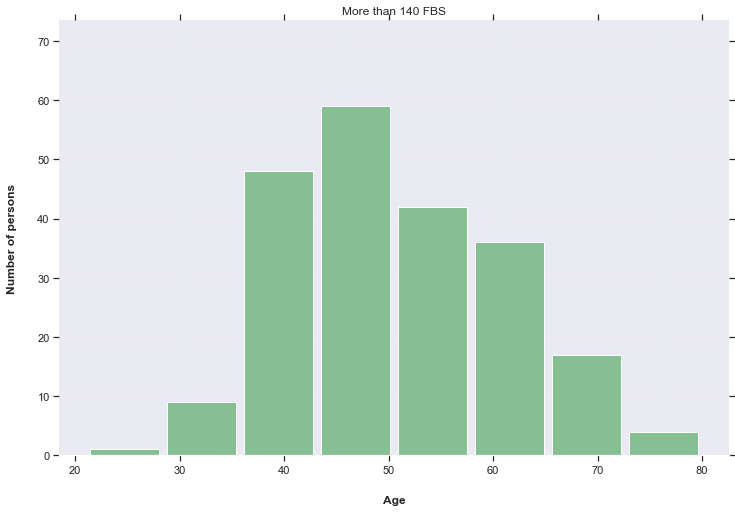

In [39]:
fbsDf = diabetes_copy.loc[(diabetes_copy["FBS"] > 140)]
#bmiDfPlot = pd.crosstab(index=bmiDf['SEX'], columns='count')
#bmiDf
#bmiDfPlot.plot(kind='bar',stacked=False, grid=False)

plotHist(fbsDf,"AGE","Age","More than 140 FBS")    

Text(0.5, 1, 'FBS with respect to AGE and Sex where FBS > 125')

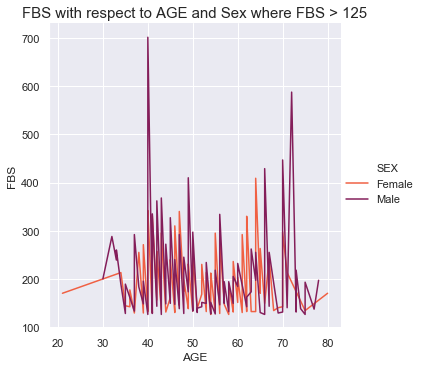

In [40]:
fbsDf = diabetes_copy_obj.loc[(diabetes_copy["FBS"] > 125)]

FBSDiabetic=sns.relplot(x="AGE", y="FBS",hue='SEX',kind="line",palette="rocket_r", estimator=None,data=fbsDf);
FBSDiabetic.ax.set_title('FBS with respect to AGE and Sex where FBS > 125',fontsize=15)
#sns.relplot(x="AGE", y="FBS",hue='SEX',kind="line",  col="BMIChart",estimator=None,data=fbsDf);

#sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

Text(0.5, 1, 'PPBS1 with respect to AGE and Sex where PPBS1 > 200')

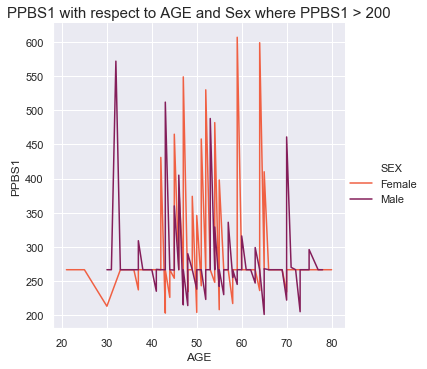

In [41]:
PPBSDf = diabetes_copy_obj.loc[(diabetes_copy["PPBS1"] >200)]

PPBS_diabetic=sns.relplot(x="AGE", y="PPBS1",hue='SEX',kind="line", palette="rocket_r", estimator=None,data=PPBSDf);
PPBS_diabetic.ax.set_title('PPBS1 with respect to AGE and Sex where PPBS1 > 200',fontsize=15)

Text(0.5, 1, 'OGTT1PGBS with respect to AGE and Sex where OGTT1PGBS > 200')

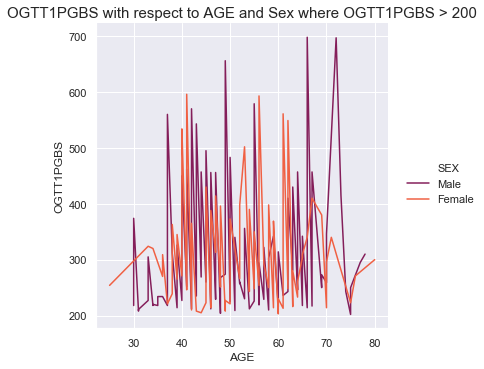

In [42]:
OGTT1PGBSdf = diabetes_copy_obj.loc[(diabetes_copy["OGTT1PGBS"] >200)]

#sns.relplot(x="AGE", y="OGTT1PGBS",hue='SEX',kind="line",  palette="rocket_r",col="BMIChart",estimator=None,data=fbsDf);
OGTT1PGBS_diabetic=sns.relplot(x="AGE", y="OGTT1PGBS",hue='SEX',kind="line",  palette="rocket",estimator=None,data=OGTT1PGBSdf);
OGTT1PGBS_diabetic.ax.set_title('OGTT1PGBS with respect to AGE and Sex where OGTT1PGBS > 200',fontsize=15)

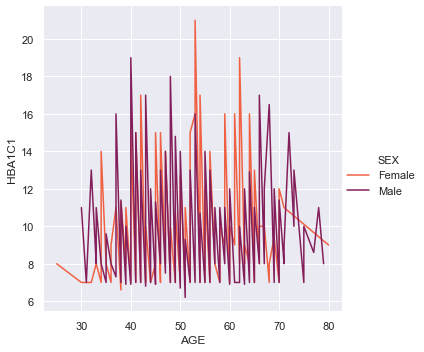

In [43]:
fbsDf = diabetes_copy_obj.loc[(diabetes_copy["HBA1C1"] >6)]

sns.relplot(x="AGE", y="HBA1C1",hue='SEX',kind="line",palette="rocket_r" ,estimator=None,data=fbsDf );

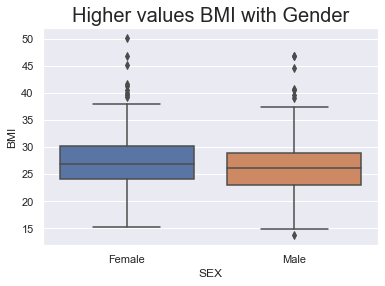

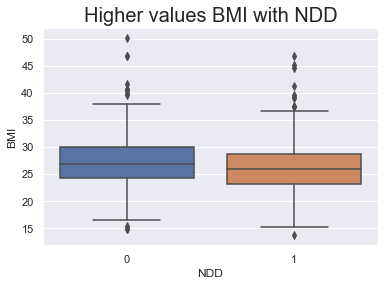

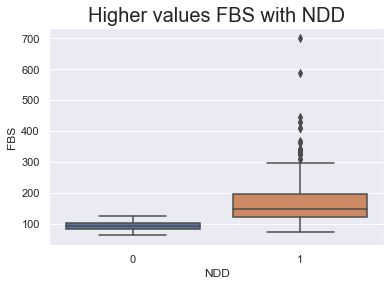

In [44]:
f = sns.boxplot(data=diabetes_copy_obj,x='SEX',y='BMI')
plt.title('Higher values BMI with Gender',fontsize=20)
plt.show()

f = sns.boxplot(data=diabetes_copy_obj,x='NDD',y='BMI')
plt.title('Higher values BMI with NDD',fontsize=20)
plt.show()

f = sns.boxplot(data=diabetes_copy_obj,x='NDD',y='FBS')
plt.title('Higher values FBS with NDD',fontsize=20)
plt.show()

col_0   count
SEX          
Female    317
Male      285


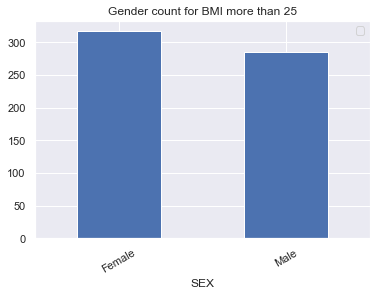

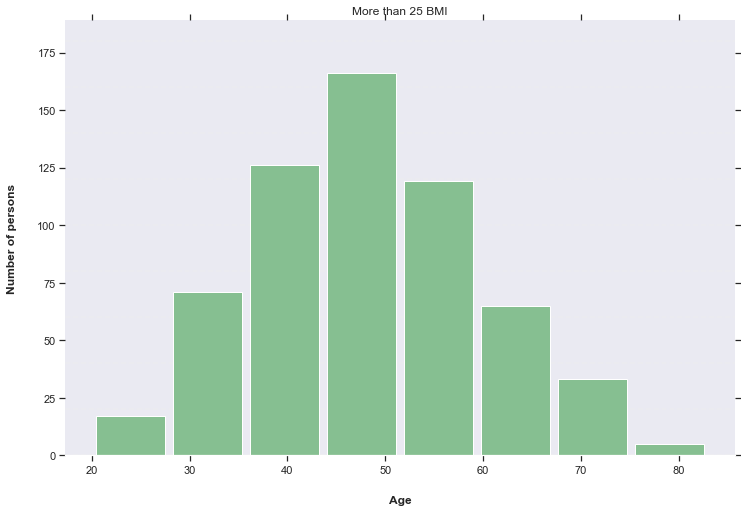

In [45]:
bmiDf = diabetes_copy_obj.loc[(diabetes_copy_obj["BMI"] > 25)]
bmiDfPlot = pd.crosstab(index=bmiDf['SEX'], columns='count')
print(bmiDfPlot)
ax = bmiDfPlot.plot(kind='bar')
ax.legend([])
plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Gender count for BMI more than 25")

plotHist(bmiDf,"AGE","Age","More than 25 BMI")    

In [46]:
corr_diabetes = diabetes_copy.select_dtypes(exclude=[object])
print(corr_diabetes.shape)

corr_diabetes.corr()


(920, 12)


,AGE,FBS,OGTT1FBS,OGTT1PGBS,PPBS1,Height1,Weight,BMI,HC,WHR,Result,BMIChart
AGE,1.000000,0.140416,0.004779,0.031441,0.188440,0.080135,-0.069709,-0.116923,-0.132112,0.156192,0.160671,-0.111203
FBS,0.140416,1.000000,0.626955,0.397470,0.644486,0.126703,-0.051602,-0.124948,-0.103280,0.091483,0.208497,-0.141321
OGTT1FBS,0.004779,0.626955,1.000000,0.692317,0.221852,0.081574,-0.012172,-0.058304,-0.088414,0.103987,0.079534,-0.082056
OGTT1PGBS,0.031441,0.397470,0.692317,1.000000,0.304727,0.059511,0.022676,-0.005549,-0.053845,0.047472,0.138609,-0.023258
PPBS1,0.188440,0.644486,0.221852,0.304727,1.000000,0.116626,-0.063977,-0.131751,-0.048768,0.029184,0.314096,-0.142565
Height1,0.080135,0.126703,0.081574,0.059511,0.116626,1.000000,0.423532,-0.091195,0.049752,0.152293,0.030558,-0.102999
Weight,-0.069709,-0.051602,-0.012172,0.022676,-0.063977,0.423532,1.000000,0.859167,0.541291,0.037241,-0.020628,0.759852
BMI,-0.116923,-0.124948,-0.058304,-0.005549,-0.131751,-0.091195,0.859167,1.000000,0.580697,-0.050984,-0.037855,0.894095
HC,-0.132112,-0.103280,-0.088414,-0.053845,-0.048768,0.049752,0.541291,0.580697,1.000000,-0.548871,-0.058946,0.499567
WHR,0.156192,0.091483,0.103987,0.047472,0.029184,0.152293,0.037241,-0.050984,-0.548871,1.000000,0.100697,-0.020488


In [47]:
### CROSS TAB - DIABETIC COUNT
pd.crosstab(index     = diabetes_copy_obj['Result'], 
            columns   = [diabetes_copy_obj['NDD'],diabetes_copy_obj['HBA1CNDD']],
            margins = True,
            dropna    = True,
            margins_name = "Total Count")


NDD                    0       1      Total Count
HBA1CNDD               0   1   0    1            
Result                                           
Diabetic               0   0   0  342         342
Healthy              443   0   0    0         443
Nascent Diabetic       0   0  50    0          50
Recovering Diabetic    0  85   0    0          85
Total Count          443  85  50  342         920

In [48]:
### BMI - DIABETIC COUNT
pd.crosstab(index     = diabetes_copy_obj['BMIChart'], 
            columns   = [diabetes_copy_obj['NDD'],diabetes_copy_obj['HBA1CNDD']],
            margins = True,
            dropna    = True,
            margins_name = "Total Count")


NDD            0       1      Total Count
HBA1CNDD       0   1   0    1            
BMIChart                                 
Normal       112  24  16  129         281
Obese        113  21   6   59         199
Overweight   203  38  27  135         403
Underweight   15   2   1   19          37
Total Count  443  85  50  342         920

In [49]:
### BMI vs DIABETIC Result COUNT
pd.crosstab(index     = diabetes_copy_obj['Result'], 
            columns   = diabetes_copy_obj['BMIChart'],
            margins = True,
            dropna    = True,
            margins_name = "Total Count")


BMIChart,Normal,Obese,Overweight,Underweight,Total Count
Result,,,,,
Diabetic,129,59,135,19,342
Healthy,112,113,203,15,443
Nascent Diabetic,16,6,27,1,50
Recovering Diabetic,24,21,38,2,85
Total Count,281,199,403,37,920


In [50]:
diab_fil1 = diabetes_copy_obj.filter(['NDD','HBA1CNDD','SEX','BMIChart','Result'], axis=1)
diab_fil1.head(10)


,NDD,HBA1CNDD,SEX,BMIChart,Result
0,1,1,Female,Obese,Diabetic
1,1,1,Female,Normal,Diabetic
2,0,0,Female,Obese,Healthy
3,1,1,Male,Normal,Diabetic
4,0,1,Female,Obese,Recovering Diabetic
5,1,1,Male,Normal,Diabetic
6,1,1,Female,Normal,Diabetic
7,1,1,Male,Overweight,Diabetic
8,1,1,Female,Underweight,Diabetic
9,1,0,Male,Overweight,Nascent Diabetic


In [51]:
pd.crosstab(index  = [diabetes_copy_obj['BMIChart'],diab_fil1['Result']],
            columns = diab_fil1['SEX'],
             margins = True,
             margins_name = "Total Count")



SEX                              Female  Male  Total Count
BMIChart    Result                                        
Normal      Diabetic                 47    82          129
            Healthy                  58    54          112
            Nascent Diabetic          8     8           16
            Recovering Diabetic      14    10           24
Obese       Diabetic                 30    29           59
            Healthy                  74    39          113
            Nascent Diabetic          5     1            6
            Recovering Diabetic      16     5           21
Overweight  Diabetic                 56    79          135
            Healthy                 109    94          203
            Nascent Diabetic         12    15           27
            Recovering Diabetic      15    23           38
Underweight Diabetic                 10     9           19
            Healthy                   5    10           15
            Nascent Diabetic          0     1            1
            Recovering Diabetic       0     2            2
Total Count                         459   461          920

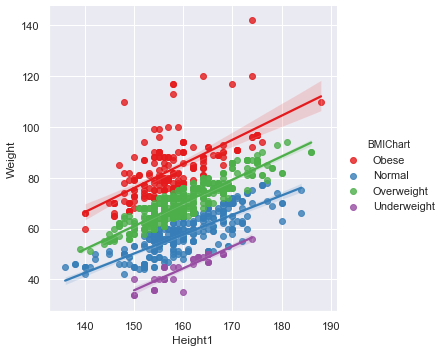

In [52]:
sns.lmplot(x = 'Height1', y = 'Weight', data = diabetes_copy_obj, fit_reg = True,
           hue = 'BMIChart', legend = True , palette="Set1")


In [53]:
pd.crosstab(index     = diabetes_copy_obj['SEX'], 
            columns   = [diabetes_copy_obj['NDD'],diabetes_copy_obj['OGTT1']],
            margins = True,
            dropna    = True,
            margins_name = "Proportion",
            normalize = 'index')


NDD                0                             1                    
OGTT1              0         1         2         0         1         2
SEX                                                                   
Female      0.045752  0.511983  0.076253  0.093682  0.241830  0.030501
Male        0.045553  0.396963  0.071584  0.101952  0.331887  0.052061
Proportion  0.045652  0.454348  0.073913  0.097826  0.286957  0.041304

In [54]:
### BMI - DIABETIC Proportion

pd.crosstab(index     = diabetes_copy_obj['BMIChart'], 
            columns   = [diabetes_copy_obj['NDD'],diabetes_copy_obj['HBA1CNDD']],
            margins = True,
            dropna    = True,
            margins_name = "Proportion",
            normalize = 'index')


NDD                 0                   1          
HBA1CNDD            0         1         0         1
BMIChart                                           
Normal       0.398577  0.085409  0.056940  0.459075
Obese        0.567839  0.105528  0.030151  0.296482
Overweight   0.503722  0.094293  0.066998  0.334988
Underweight  0.405405  0.054054  0.027027  0.513514
Proportion   0.481522  0.092391  0.054348  0.371739

In [55]:
### BMI - DIABETIC Proportion

pd.crosstab(index     = diabetes_copy_obj['BMIChart'], 
            columns   = [diabetes_copy_obj['NDD'],diabetes_copy_obj['HBA1CNDD']],
            margins = True,
            dropna    = True,
            margins_name = "Proportion",
            normalize = 'index')


NDD                 0                   1          
HBA1CNDD            0         1         0         1
BMIChart                                           
Normal       0.398577  0.085409  0.056940  0.459075
Obese        0.567839  0.105528  0.030151  0.296482
Overweight   0.503722  0.094293  0.066998  0.334988
Underweight  0.405405  0.054054  0.027027  0.513514
Proportion   0.481522  0.092391  0.054348  0.371739

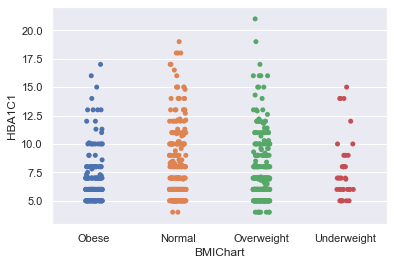

In [56]:
sns.stripplot(x="BMIChart", y="HBA1C1", data=diabetes_copy_obj)

Text(0.5, 1.0, 'Bar Plot on HBA1C1 and Diabetes Grade based on the gender')

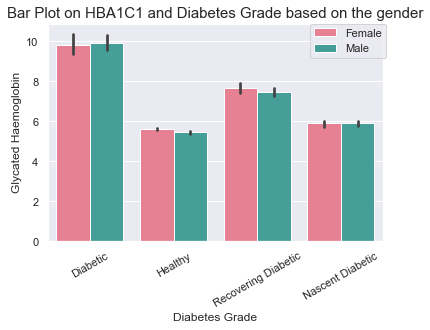

In [57]:
#'Bar Plot on HBA1C1 and Diabetes Grade based on the gender
fig = sns.barplot(x='Result',y='HBA1C1',data=diabetes_copy_obj,palette="husl",hue='SEX')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xticks(rotation=30, horizontalalignment="center")
fig.set_xlabel("Diabetes Grade")
fig.set_ylabel("Glycated Haemoglobin")
plt.title('Bar Plot on HBA1C1 and Diabetes Grade based on the gender',fontsize=15)
#diabetes_data.plot.bar()


Text(0.5, 1.0, 'Bar Plot on HBA1C1 and BMI Value based on the gender')

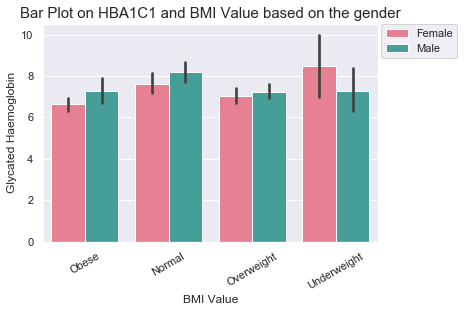

In [58]:
#Bar Plot on HBA1C1 and BMI Value based on the genderdiabetes_copy['HBA1C1']= pd.to_numeric(diabetes_copy['HBA1C1'])
fig = sns.barplot(x='BMIChart',y='HBA1C1',data=diabetes_copy_obj,palette="husl",hue ="SEX")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.xticks(rotation=30, horizontalalignment="center")
fig.set_xlabel("BMI Value")
fig.set_ylabel("Glycated Haemoglobin")
plt.title('Bar Plot on HBA1C1 and BMI Value based on the gender',fontsize=15)
#diabetes_data.plot.bar()


Text(0.5, 1, 'Extreme Values of BMI with Age')

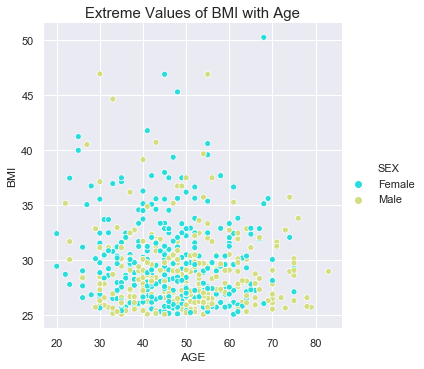

In [59]:
#Scatter plot for BMI Outliers added on 05Oct2020
#diabetes_copy.loc[(diabetes_copy['SEX'] == 0),'Gender'] = 'Female'
#diabetes_copy.loc[(diabetes_copy['SEX'] == 1),'Gender'] = 'Male'

BMI_Outlier = diabetes_copy_obj.loc[(diabetes_copy['BMI'] > 25)]
BMI_Out=sns.relplot(x='AGE', y='BMI',hue='SEX',data=BMI_Outlier,palette='rainbow');
BMI_Out.ax.set_title('Extreme Values of BMI with Age',fontsize=15)


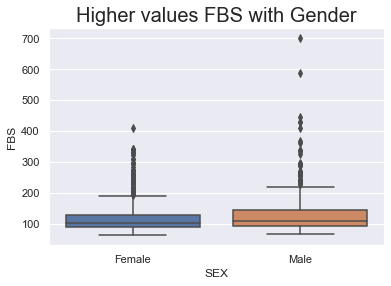

In [60]:
f = sns.boxplot(data=diabetes_copy_obj,x='SEX',y='FBS')
plt.title('Higher values FBS with Gender',fontsize=20)
plt.show()


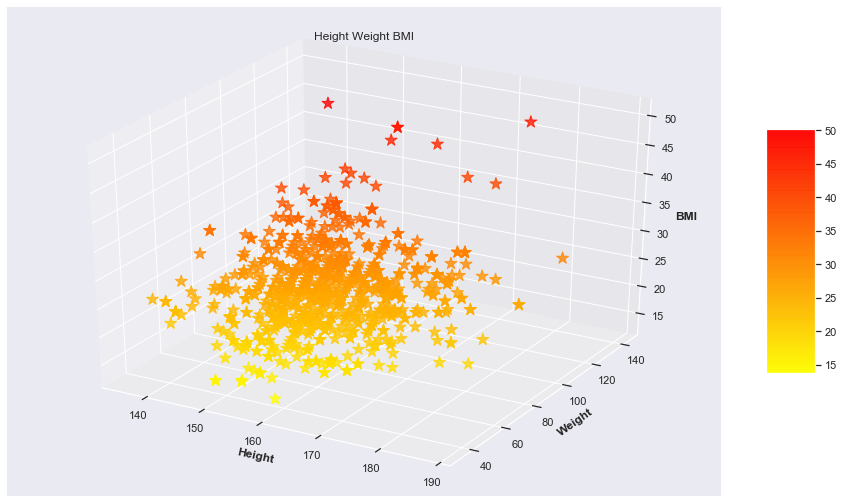

In [61]:
from mpl_toolkits.mplot3d import Axes3D
z = diabetes_copy_obj["BMI"]
x = diabetes_copy_obj["Height1"]
y = diabetes_copy_obj["Weight"]

fig = plt.figure(figsize = (16, 9))
ax = plt.axes(projection ="3d")
   
# Add x, y gridlines 
ax.grid(b = True, color ='grey',
        linestyle ='-.', linewidth = 0.3, 
        alpha = 0.2) 
 
# Creating color map
my_cmap = plt.get_cmap('autumn_r')
 
# Creating plot
sctt = ax.scatter3D(x, y, z,alpha = 0.8, c=(y/(x*x))*10000, cmap = my_cmap, marker ='*', s=160)
 
plt.title("Height Weight BMI")
ax.set_xlabel('Height', fontweight ='bold') 
ax.set_ylabel('Weight', fontweight ='bold') 
ax.set_zlabel('BMI', fontweight ='bold')
fig.colorbar(sctt, ax = ax, shrink = 0.5, aspect = 5)
plt.show()

In [62]:
diabetes_WHR_BoxRange_Male = pd.DataFrame(columns=['WHR','SEX','Result'], data=diabetes_copy_obj[(diabetes_copy_obj.SEX == 'Male') & (diabetes_copy_obj.Result != 'Healthy')])
diabetes_WHR_BoxRange_Female = pd.DataFrame(columns=['WHR','SEX','Result'], data=diabetes_copy_obj[(diabetes_copy_obj.SEX == 'Female') & (diabetes_copy_obj.Result != 'Healthy')])
diabetes_WHR_BoxRange_Male.insert(1,"WHR_Range",0)
diabetes_WHR_BoxRange_Female.insert(1,"WHR_Range",0)
diabetes_WHR_BoxRange_Male=diabetes_WHR_BoxRange_Male.astype({'WHR_Range':object})
diabetes_WHR_BoxRange_Female=diabetes_WHR_BoxRange_Female.astype({'WHR_Range':object})
diabetes_WHR_BoxRange_Male.loc[(diabetes_WHR_BoxRange_Male['WHR']<= 0.96),'WHR_Range'] = '<= 0.95 - Low'
diabetes_WHR_BoxRange_Male.loc[((diabetes_WHR_BoxRange_Male['WHR']>=0.96) & (diabetes_WHR_BoxRange_Male['WHR']<1.00)), 'WHR_Range'] = '0.96–1.0 - Moderate'
diabetes_WHR_BoxRange_Male.loc[((diabetes_WHR_BoxRange_Male['WHR']>=1.00)),'WHR_Range'] = '> 1.00 - High'

diabetes_WHR_BoxRange_Female.loc[(diabetes_WHR_BoxRange_Female['WHR']<= 0.81),'WHR_Range'] = '<= 0.80 - Low'
diabetes_WHR_BoxRange_Female.loc[((diabetes_WHR_BoxRange_Female['WHR']>=0.81) & (diabetes_WHR_BoxRange_Female['WHR']<0.85)), 'WHR_Range'] = '0.81–0.85 - Moderate'
diabetes_WHR_BoxRange_Female.loc[((diabetes_WHR_BoxRange_Female['WHR']>=0.86)),'WHR_Range'] = '> 0.86 - High'


Text(0.5, 1.0, 'Bar Plot on WHR on Male Diabetic Candidates')

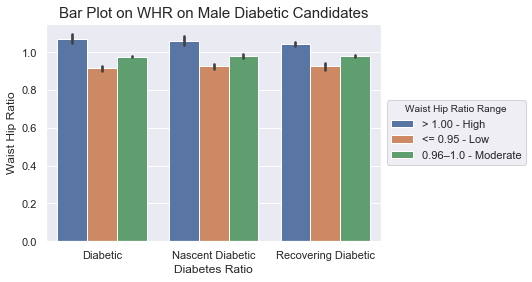

In [63]:
#Male Version
fig1 = sns.barplot(y='WHR',x='Result',data=diabetes_WHR_BoxRange_Male, hue='WHR_Range')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

plt.legend(title='Waist Hip Ratio Range',loc='center left', bbox_to_anchor=(1, 0.5))
fig1.set_xlabel("Diabetes Ratio")
fig1.set_ylabel("Waist Hip Ratio")
plt.title('Bar Plot on WHR on Male Diabetic Candidates',fontsize=15)


Text(0.5, 1.0, 'Bar Plot on WHR on Female Diabetic Candidates')

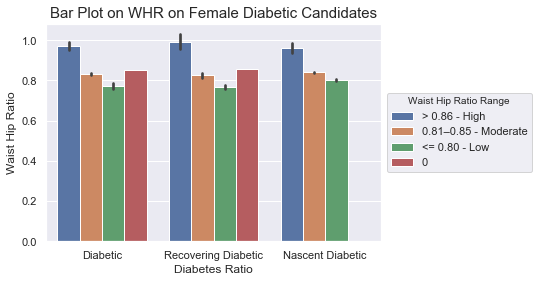

In [64]:
#Female Version
fig1 = sns.barplot(y='WHR',x='Result',data=diabetes_WHR_BoxRange_Female, hue='WHR_Range')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)

plt.legend(title='Waist Hip Ratio Range',loc='center left', bbox_to_anchor=(1, 0.5))
fig1.set_xlabel("Diabetes Ratio")
fig1.set_ylabel("Waist Hip Ratio")
plt.title('Bar Plot on WHR on Female Diabetic Candidates',fontsize=15)


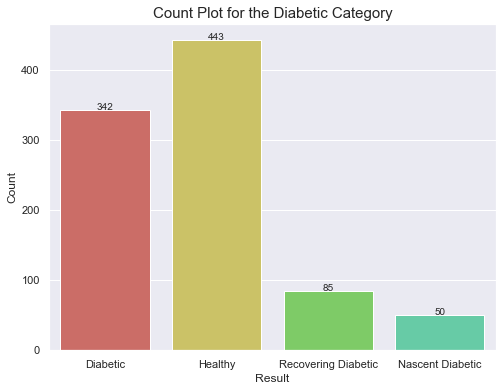

In [65]:
fig, ax1 = plt.subplots(figsize=(8,6))
sns.set_palette(sns.color_palette('hls', 7))
graph = sns.countplot(ax=ax1,x='Result', data=diabetes_copy_obj)
plt.title("Count Plot for the Diabetic Category",fontsize=15)
graph.set_ylabel("Count")
graph.set_xticklabels(graph.get_xticklabels())
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")


Text(0, 0.5, 'Count')

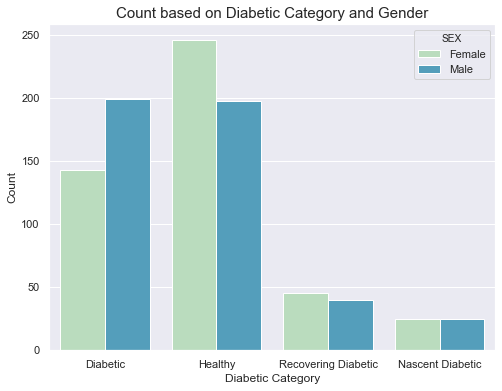

In [66]:
fig, ax2 = plt.subplots(figsize=(8,6))
g = sns.countplot(ax=ax2,x = 'Result', hue='SEX', data=diabetes_copy_obj,palette='GnBu')
plt.title("Count based on Diabetic Category and Gender",fontsize=15)
g.set_xlabel("Diabetic Category")
g.set_ylabel("Count")


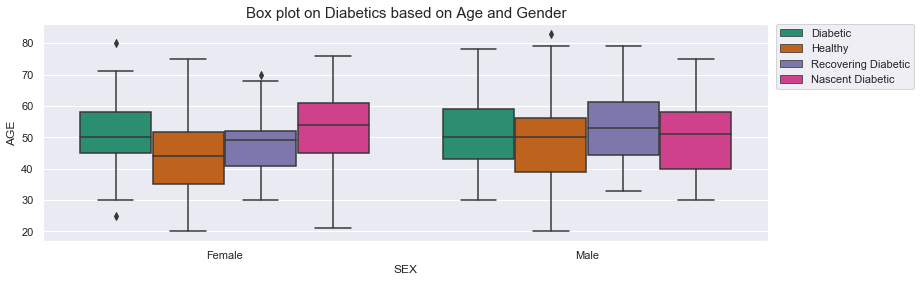

In [80]:
plt.figure(figsize=(13,4))
sns.boxplot(data=diabetes_copy_obj,x='SEX',y='AGE',hue='Result',palette='Dark2')
plt.title('Box plot on Diabetics based on Age and Gender',fontsize=15)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()


In [76]:
diabetes_WHR_BoxRange_Male = pd.DataFrame(columns=['WHR','SEX','Result'], data=diabetes_copy_obj[(diabetes_copy_obj.SEX == 'Male') & (diabetes_copy_obj.Result != 'Healthy')])
diabetes_WHR_BoxRange_Female = pd.DataFrame(columns=['WHR','SEX','Result'], data=diabetes_copy_obj[(diabetes_copy_obj.SEX == 'Female') & (diabetes_copy_obj.Result != 'Healthy')])
diabetes_WHR_BoxRange_Male.insert(1,"WHR_Range",0)
diabetes_WHR_BoxRange_Female.insert(1,"WHR_Range",0)
diabetes_WHR_BoxRange_Male=diabetes_WHR_BoxRange_Male.astype({'WHR_Range':object})
diabetes_WHR_BoxRange_Female=diabetes_WHR_BoxRange_Female.astype({'WHR_Range':object})
diabetes_WHR_BoxRange_Male.loc[(diabetes_WHR_BoxRange_Male['WHR']<= 0.96),'WHR_Range'] = '<= 0.95 - Low'
diabetes_WHR_BoxRange_Male.loc[((diabetes_WHR_BoxRange_Male['WHR']>=0.96) & (diabetes_WHR_BoxRange_Male['WHR']<1.00)), 'WHR_Range'] = '0.96–1.0 - Moderate'
diabetes_WHR_BoxRange_Male.loc[((diabetes_WHR_BoxRange_Male['WHR']>=1.00)),'WHR_Range'] = '> 1.00 - High'

diabetes_WHR_BoxRange_Female.loc[(diabetes_WHR_BoxRange_Female['WHR']<= 0.81),'WHR_Range'] = '<= 0.80 - Low'
diabetes_WHR_BoxRange_Female.loc[((diabetes_WHR_BoxRange_Female['WHR']>=0.81) & (diabetes_WHR_BoxRange_Female['WHR']<0.85)), 'WHR_Range'] = '0.81–0.85 - Moderate'
diabetes_WHR_BoxRange_Female.loc[((diabetes_WHR_BoxRange_Female['WHR']>=0.85)),'WHR_Range'] = '> 0.86 - High'


Text(0.5, 1.0, 'Bar Plot on WHR on Male Diabetic Candidates')

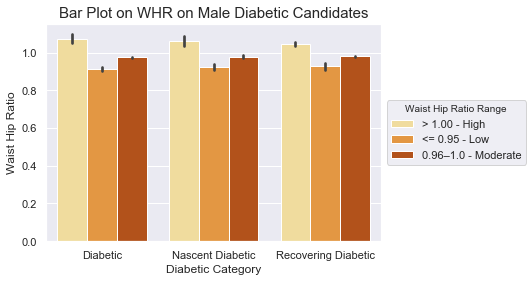

In [77]:
fig1 = sns.barplot(y='WHR',x='Result',data=diabetes_WHR_BoxRange_Male, hue='WHR_Range',palette='YlOrBr')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.legend(title='Waist Hip Ratio Range',loc='center left', bbox_to_anchor=(1, 0.5))
fig1.set_xlabel("Diabetic Category")
fig1.set_ylabel("Waist Hip Ratio")
plt.title('Bar Plot on WHR on Male Diabetic Candidates',fontsize=15)


Text(0.5, 1.0, 'Bar Plot on WHR on Female Diabetic Candidates')

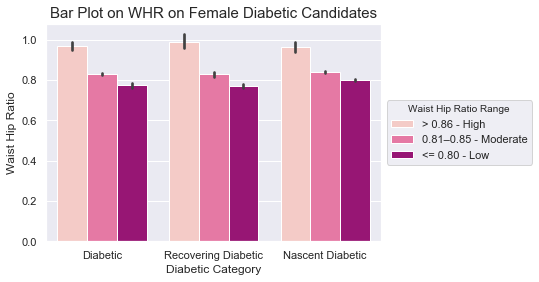

In [78]:
fig1 = sns.barplot(y='WHR',x='Result',data=diabetes_WHR_BoxRange_Female, hue='WHR_Range',palette='RdPu')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.legend(title='Waist Hip Ratio Range',loc='center left', bbox_to_anchor=(1, 0.5))
fig1.set_xlabel("Diabetic Category")
fig1.set_ylabel("Waist Hip Ratio")
plt.title('Bar Plot on WHR on Female Diabetic Candidates',fontsize=15)


Text(0.5, 1.0, 'Bar Plot on HC and Diabetic Category based on gender')

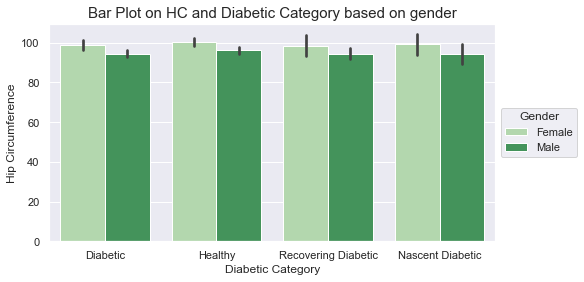

In [32]:
plt.figure(figsize=(8,4))
fig1 = sns.barplot(y='HC',x='Result',data=diabetes_copy_obj, hue='SEX',palette='Greens')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.legend(title='Gender',loc='center left', bbox_to_anchor=(1, 0.5))
fig1.set_xlabel("Diabetic Category")
fig1.set_ylabel("Hip Circumference")
plt.title('Bar Plot on HC and Diabetic Category based on gender',fontsize=15)


Text(0.5, 1.0, 'Correlation of Weight with HC')

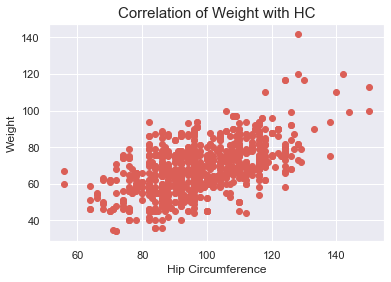

In [72]:
#Scatter plot for correlation of Weight and Hip Circumference
plt.scatter(diabetes_copy["HC"],diabetes_copy["Weight"])
plt.xlabel("Hip Circumference")
plt.ylabel("Weight")
plt.title("Correlation of Weight with HC",fontsize=15)


Text(0.5, 1.1, 'Pairplot of BMI and HC')

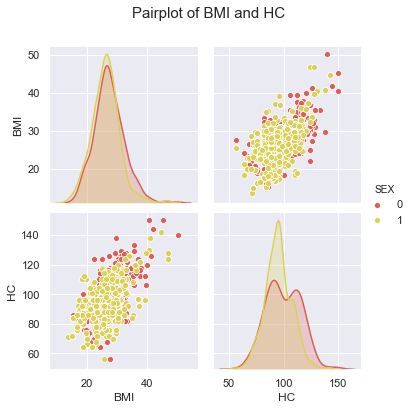

In [73]:
#Pair plots - BMI and HC
sns.pairplot(diabetes_copy,vars=["BMI","HC"],hue="SEX")
plt.suptitle("Pairplot of BMI and HC",fontsize=15,y=1.1)


Text(0.5, 1.0, 'Correlation of Height and Weight')

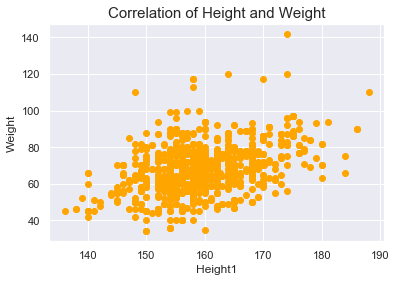

In [74]:
#Scatter plot for correlation of Weight and Height
#Scatter plot for correlation of BM1 with HC
plt.scatter(diabetes_copy["Height1"],diabetes_copy["Weight"],c='orange')
plt.xlabel("Height1")
plt.ylabel("Weight")
plt.title("Correlation of Height and Weight",fontsize=15)


Text(0.5, 1.0, 'Correlation of BMI with HC')

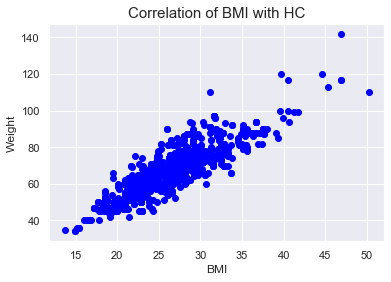

In [75]:
#Scatter plot for BMI and Weight
plt.scatter(diabetes_copy["BMI"],diabetes_copy["Weight"],c='blue')
plt.xlabel("BMI")
plt.ylabel("Weight")
plt.title("Correlation of BMI with HC",fontsize=15)

# code for reference

In [ ]:
#next set of code for checking possible null values
#This code is not used anywhere ...just for my reference
chk=diabetes_data.loc[(diabetes_data['OGTT1FBS'])!=(diabetes_data['FBS'])]
chk=chk[chk['OGTT1FBS'].notnull()]

In [ ]:
#This code is not used anywhere ...just for my reference
NDD_GTest = diabetes_copy.loc[diabetes_copy['NDD'] == 1]
NDD_GTest.count
diabetes_copy.NDD.value_counts()

In [ ]:
#HBA1CNDD test computation
#HBA1CNDD_test = diabetes_data.loc[(diabetes_data['HBA1C1'] > 6)]
#This code is not used anywhere ...just for my reference
# both mismatch variables return one record

HBA1CNDD_TestG6 = diabetes_data.loc[(diabetes_data['HBA1C1'] > 6) & (diabetes_data['HBA1CNDD'] == 1)]
HBA1CNDD_TestG6_mismatch = diabetes_data.loc[(diabetes_data['HBA1C1'] > 6) != (diabetes_data['HBA1CNDD'] == 1)]

HBA1CNDD_TestL6=diabetes_data.loc[(diabetes_data['HBA1C1']<=6) & (diabetes_data['HBA1CNDD']==0) ]
HBA1CNDD_TestL6_Mismatch=diabetes_data.loc[(diabetes_data['HBA1C1']<=6) !=(diabetes_data['HBA1CNDD']==0) ]

In [ ]:
##NDD Computation
#diabetes_data['PPBS1'].apply(lambda x:x.isspace() == True)
#This code is not used anywhere ...just for my reference

NDD_GTest = diabetes_data.loc[(diabetes_data['FBS'] > 125) | (diabetes_data['PPBS1'] > 200) | (diabetes_data['OGTT1PGBS'] > 200)]
NDD_GTest = diabetes_data.loc[(diabetes_data['NDD'] == 1) & ((diabetes_data['FBS'] > 125) | ((diabetes_data['PPBS1'] > 200) | (diabetes_data['OGTT1PGBS'] > 200)))]

NDD_LTest = diabetes_data.loc[(diabetes_data['FBS'] < 125) & (diabetes_data['PPBS1'] < 200) | (diabetes_data['OGTT1PGBS'] < 200)]
NDD_LTest = diabetes_data.loc[(diabetes_data['NDD'] == 0) & ((diabetes_data['FBS'] < 125) & (diabetes_data['PPBS1'] < 200) | (diabetes_data['OGTT1PGBS'] > 200))]
9+